In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
train_df =pd.read_csv("C:/Users/heman/Downloads/archive (12)/Placement_Data_Full_Class.csv")

In [56]:
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            67
status             0
dtype: int64

In [57]:
train_df['salary']=train_df['salary'].fillna(train_df['salary'].mean())

In [58]:
train_df['degree_t'].unique()   

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [59]:
train_df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [60]:
train_df['gender']=train_df['gender'].replace({'M':1,'F':0})

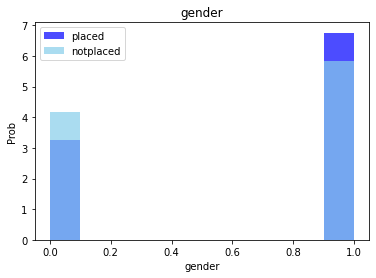

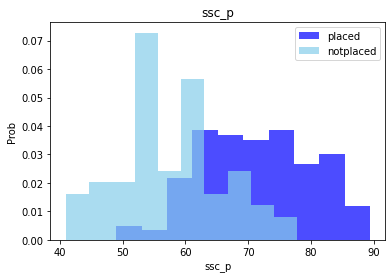

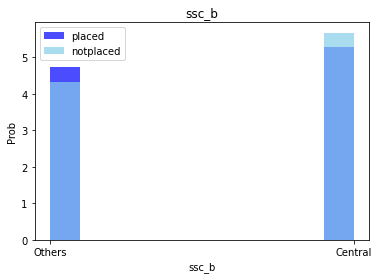

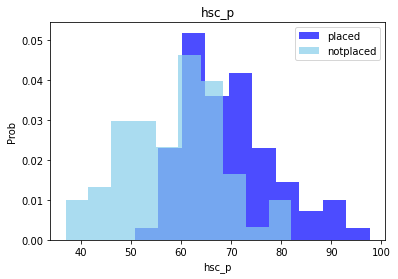

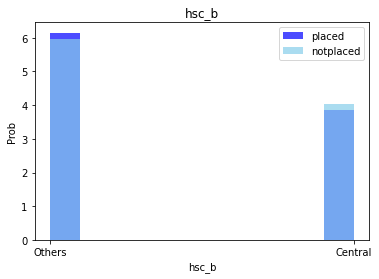

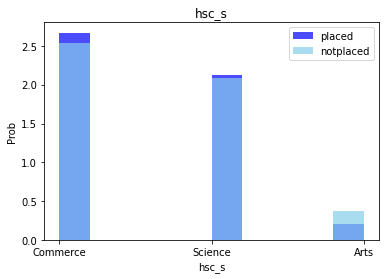

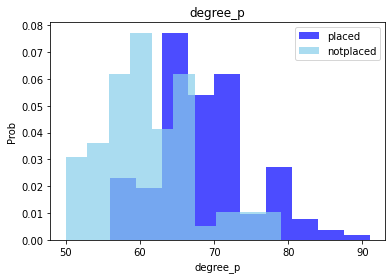

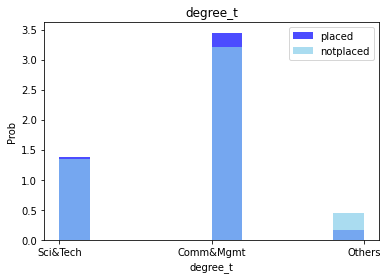

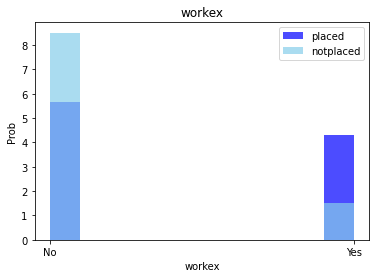

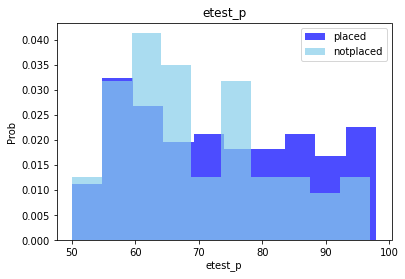

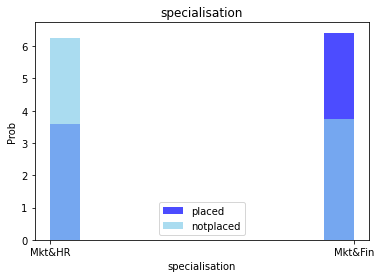

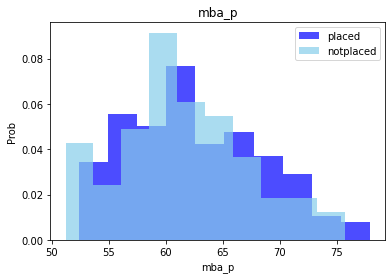

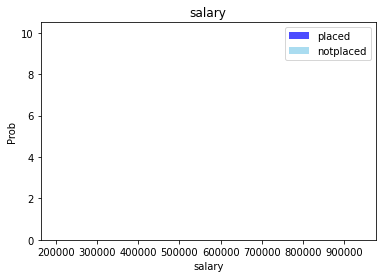

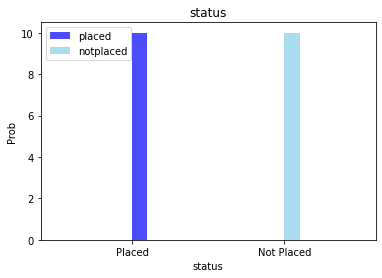

In [61]:
for x in train_df.columns[1:]:
    plt.hist(train_df[train_df["status"]=="Placed"][x], color='blue',label='placed',alpha=0.7,density=True)
    plt.hist(train_df[train_df["status"]=="Not Placed"][x], color='skyblue',label='notplaced',alpha=0.7,density=True)
    plt.title(x)
    plt.ylabel("Prob")
    plt.xlabel(x)
    plt.legend()
    plt.show()
    print()

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = le.fit_transform(train_df[column])
       

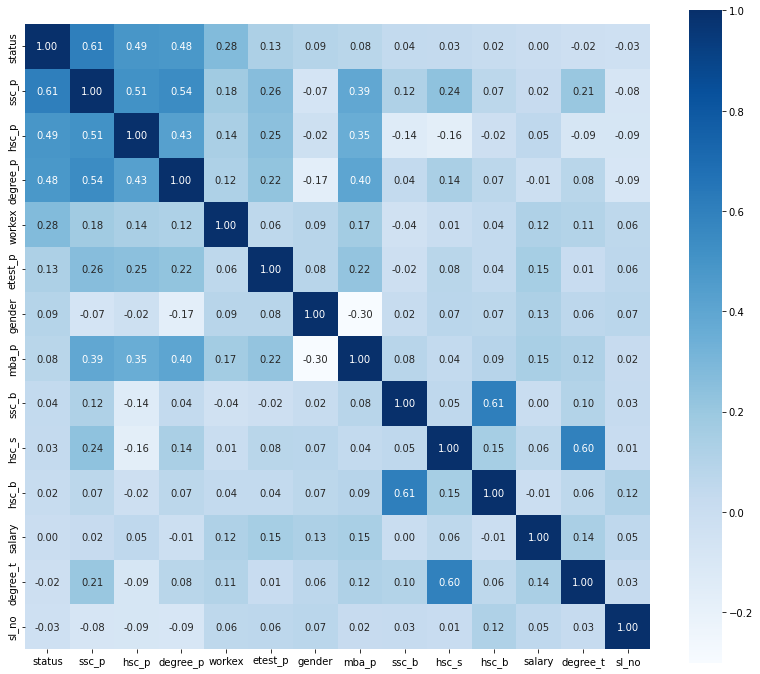

In [63]:
corrmat = train_df.corr()   # corr() function calculates the Pearson correlation coefficients between pairs of features
k = 14  
cols = corrmat.nlargest(k, 'status')['status'].index  
cm = np.corrcoef(train_df[cols].values.T)  
plt.figure(figsize=(14,12))   
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues', linecolor='white')

In [64]:
train_df = train_df.dropna(axis=1)

X = train_df.drop(["status"], axis=1)
y = train_df["status"]

In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),  # Increased max_iter for convergence
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Ada", AdaBoostClassifier()),
    ("Gradient", GradientBoostingClassifier()),
    ("XGB", XGBClassifier())]

In [67]:
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"Classifier: {name}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy*100:.2f}")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall*100:.2f}")
    print(f"F1-Score: {f1*100:.2f}")
    print("-" * 40)

Classifier: Logistic Regression
Confusion Matrix:
[[ 2 10]
 [ 2 29]]
Accuracy: 72.09
Precision: 67.56
Recall: 72.09
F1-Score: 66.71
----------------------------------------
Classifier: Decision Tree
Confusion Matrix:
[[12  0]
 [ 1 30]]
Accuracy: 97.67
Precision: 97.85
Recall: 97.67
F1-Score: 97.70
----------------------------------------
Classifier: Random Forest
Confusion Matrix:
[[ 9  3]
 [ 1 30]]
Accuracy: 90.70
Precision: 90.66
Recall: 90.70
F1-Score: 90.42
----------------------------------------
Classifier: Naive Bayes
Confusion Matrix:
[[12  0]
 [ 0 31]]
Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1-Score: 100.00
----------------------------------------
Classifier: Ada
Confusion Matrix:
[[12  0]
 [ 1 30]]
Accuracy: 97.67
Precision: 97.85
Recall: 97.67
F1-Score: 97.70
----------------------------------------
Classifier: Gradient
Confusion Matrix:
[[12  0]
 [ 1 30]]
Accuracy: 97.67
Precision: 97.85
Recall: 97.67
F1-Score: 97.70
----------------------------------------
Class